In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os


import numpy as np
import math as mat

%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Limpieza de datos

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto data1/Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.sample(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6592,6593,15645904,Parsons,685,France,Female,33,6,0.00,2,0,1,186785.01,0
624,625,15745307,Ch'iu,477,Spain,Female,48,2,129120.64,1,0,1,26475.79,0
6440,6441,15772559,Burrows,790,France,Female,47,10,148636.21,1,0,1,16119.96,1
5182,5183,15613102,Ogochukwu,670,France,Female,31,2,57530.06,1,1,1,181893.31,1
8827,8828,15580149,Fowler,638,Spain,Male,41,7,0.00,2,1,0,43889.41,0
8853,8854,15800031,Laura,681,France,Male,43,3,66338.68,1,1,1,18772.50,1
9815,9816,15745431,Chinonyelum,604,France,Male,34,7,0.00,2,1,1,188078.55,0


In [ ]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
data.duplicated(keep='last').sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

In [3]:
data.drop(["RowNumber","CustomerId","Surname"],axis=1, inplace=True)

In [ ]:
data.head()

# Visualizar

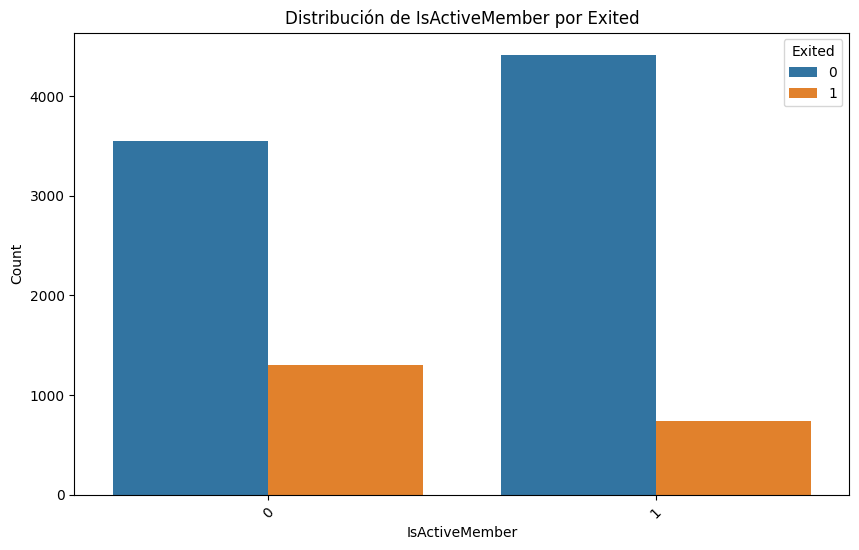

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='IsActiveMember', hue='Exited')
plt.title('Distribución de IsActiveMember por Exited')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


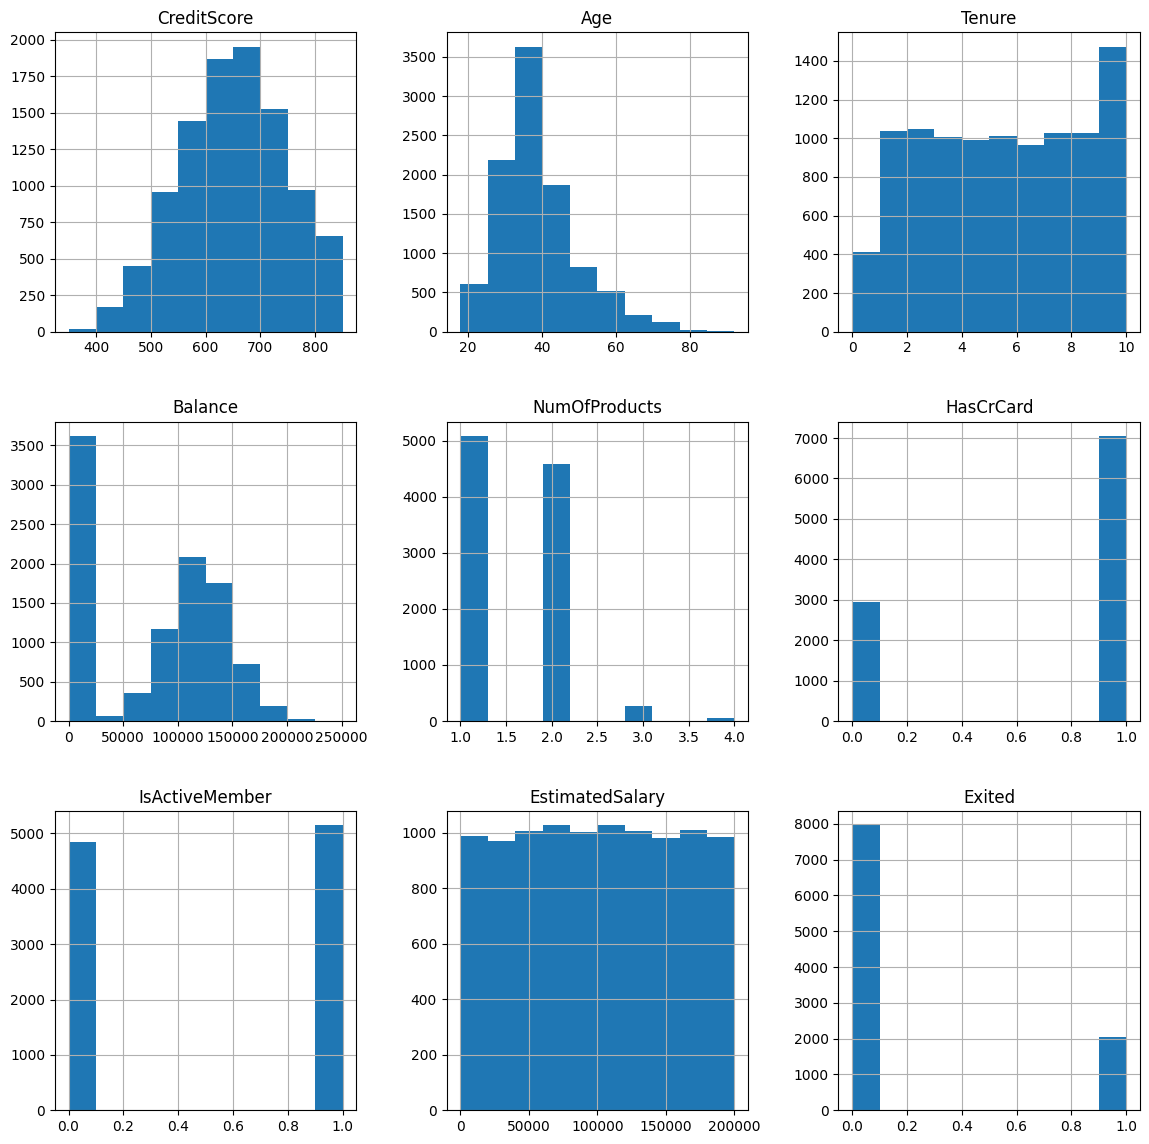

In [ ]:
data.hist(figsize=(14, 14))
plt.show()

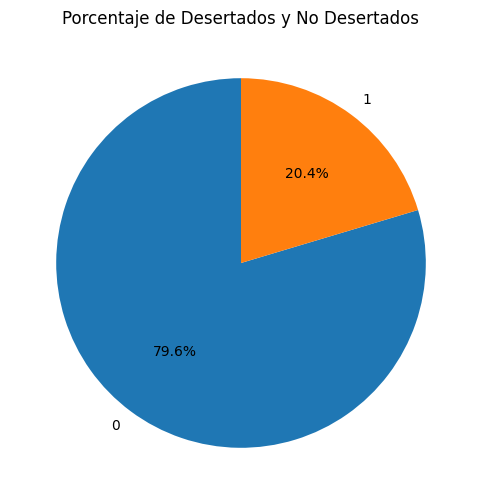

In [ ]:

conteo = data['Exited'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(10,6))
plt.pie(conteo, labels=['0', '1'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Desertados y No Desertados')
plt.show()

In [5]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-9-28dc7ae93ce1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


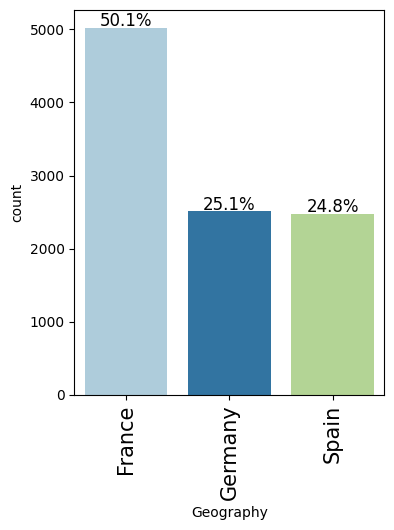

In [ ]:
labeled_barplot(data, "Geography", perc=True)

<ipython-input-9-28dc7ae93ce1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


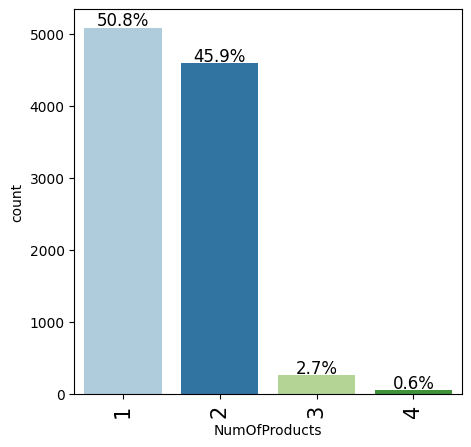

In [ ]:
labeled_barplot(data, "NumOfProducts", perc=True)

<ipython-input-9-28dc7ae93ce1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


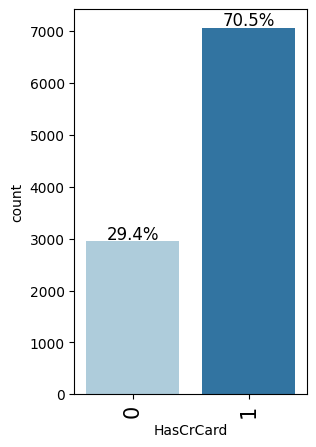

In [ ]:
labeled_barplot(data, "HasCrCard", perc=True)

<ipython-input-9-28dc7ae93ce1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


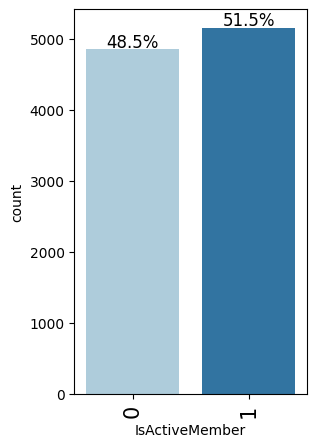

In [ ]:
labeled_barplot(data, "IsActiveMember", perc=True)

In [7]:
correlation = data.select_dtypes(include=[np.number]).corr()

correlation.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.183044,-0.121440,-0.090790,-0.052634,-0.133166,-0.049942,-0.131661,-0.203656
Age,-0.183044,1.000000,-0.193446,-0.024238,-0.188870,-0.190257,-0.008459,-0.183146,0.418189
Tenure,-0.121440,-0.193446,1.000000,-0.125092,-0.042820,-0.066029,-0.167375,-0.106821,-0.166453
Balance,-0.090790,-0.024238,-0.125092,1.000000,-0.650636,-0.125230,-0.122985,-0.073716,0.154568
NumOfProducts,-0.052634,-0.188870,-0.042820,-0.650636,1.000000,-0.062164,-0.040614,-0.053590,-0.226923
HasCrCard,-0.133166,-0.190257,-0.066029,-0.125230,-0.062164,1.000000,-0.131387,-0.144320,-0.152725
IsActiveMember,-0.049942,-0.008459,-0.167375,-0.122985,-0.040614,-0.131387,1.000000,-0.139486,-0.424547
EstimatedSalary,-0.131661,-0.183146,-0.106821,-0.073716,-0.053590,-0.144320,-0.139486,1.000000,-0.114979
Exited,-0.203656,0.418189,-0.166453,0.154568,-0.226923,-0.152725,-0.424547,-0.114979,1.000000


In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

NameError: name 'correlation' is not defined

<Figure size 1500x500 with 0 Axes>

# codificacion

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

In [11]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [15]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto data1/churn_limpio.csv', index=False)

# Entrenamiento de modelo

In [ ]:
X = data.copy()


X = X.drop(['Exited'], axis=1)


print(X.shape)

(10000, 10)


In [ ]:
y = data.Exited

# Transforma 'target' en un array de NumPy y cambia su forma a un array bidimensional
y = y.values.reshape(-1,1)

# Imprime 'target'
print(y)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


Este es un codigo donde agarra varios modelos y los entrena para ver el rendimiento de cada uno y asi sacar el mejor.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una lista de modelos
modelos = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(), #Support Vector Classifier
    MLPClassifier(), #Multi-layer Perceptron Classifier
    XGBClassifier() #XGBoost Classifier
]

# Entrenar cada modelo y calcular su precisión
for modelo in modelos:
    modelo.fit(X_train, y_train.ravel())
    y_pred = modelo.predict(X_test)
    print(f'Precisión de {modelo.__class__.__name__}: {accuracy_score(y_test, y_pred)}')


Precisión de DecisionTreeClassifier: 0.7805
Precisión de RandomForestClassifier: 0.868
Precisión de SVC: 0.8035
Precisión de MLPClassifier: 0.804
Precisión de XGBClassifier: 0.861


Este codigo imprime la presicion y el f1 score, ademas hace un grafico de matriz de confusion de cada uno

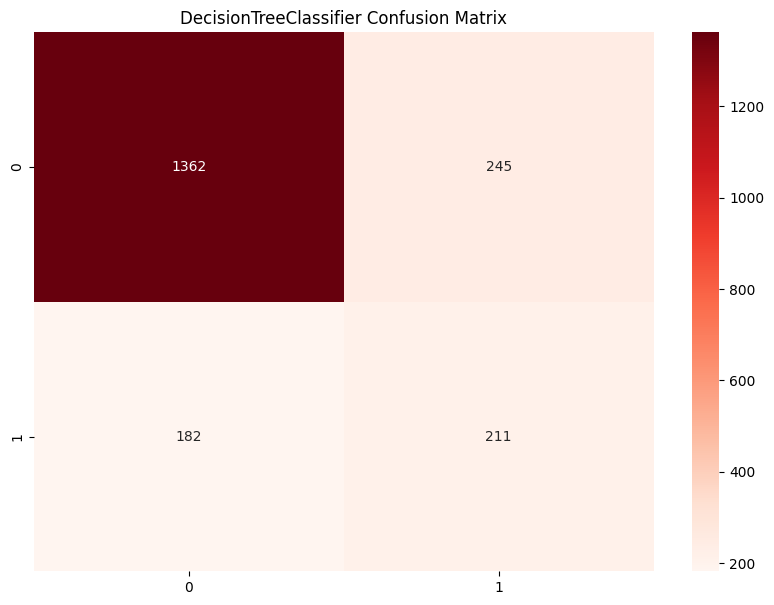

Accuracy on test for DecisionTreeClassifier: 0.7865

F1 score on test for DecisionTreeClassifier: 0.4970553592461719



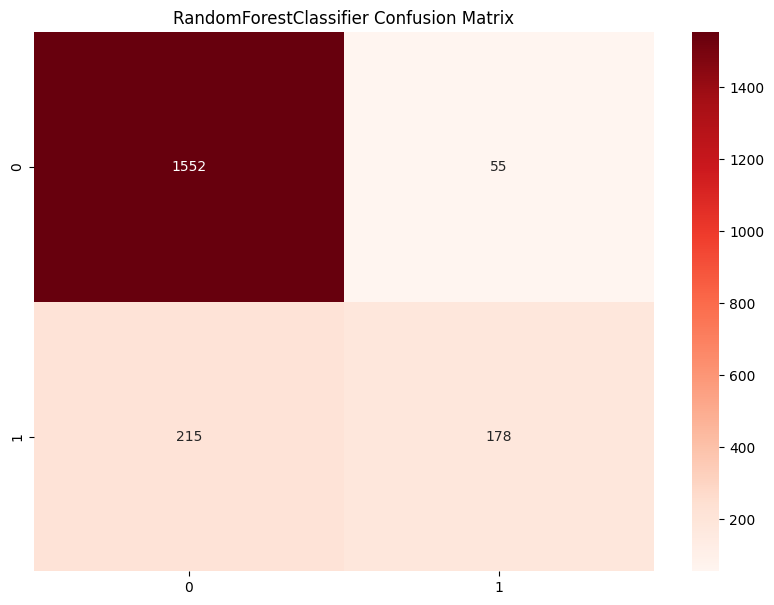

Accuracy on test for RandomForestClassifier: 0.865

F1 score on test for RandomForestClassifier: 0.5686900958466453



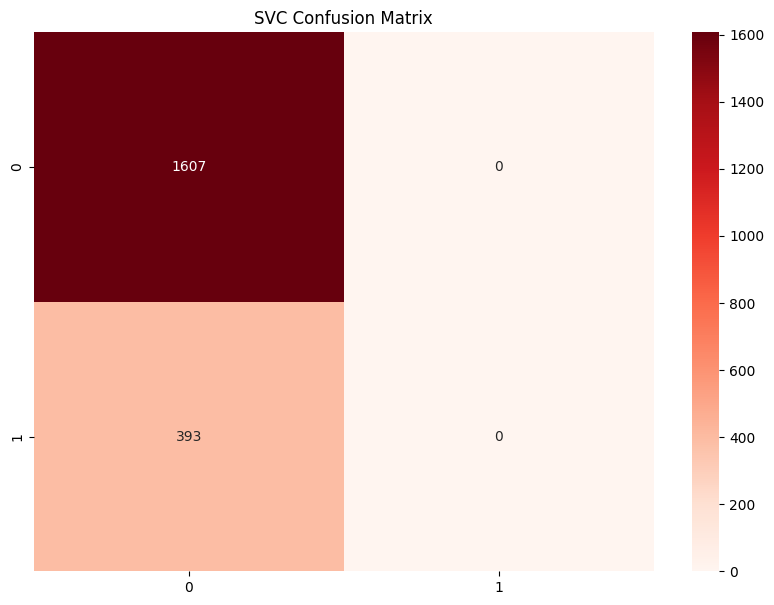

Accuracy on test for SVC: 0.8035

F1 score on test for SVC: 0.0



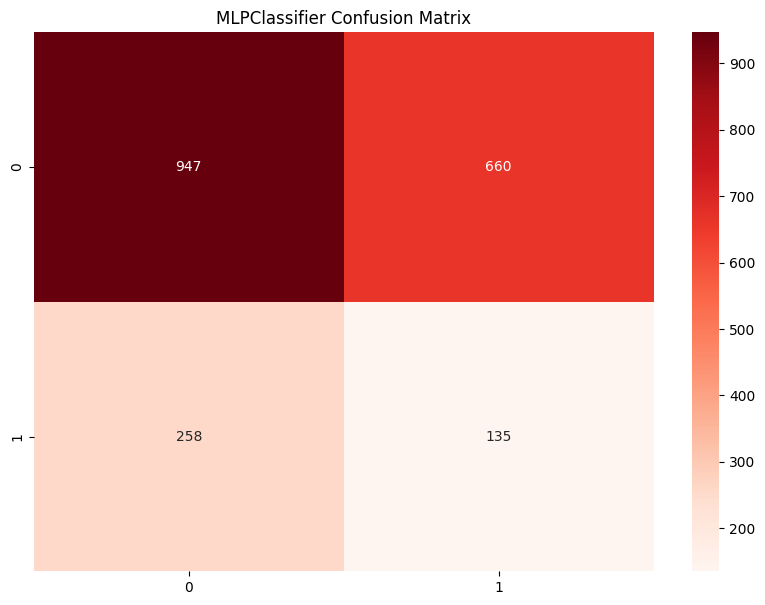

Accuracy on test for MLPClassifier: 0.541

F1 score on test for MLPClassifier: 0.22727272727272727



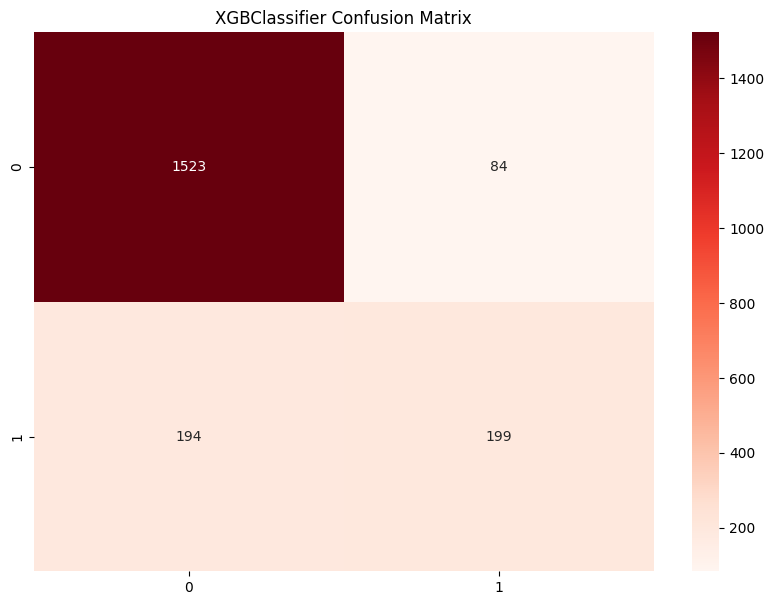

Accuracy on test for XGBClassifier: 0.861

F1 score on test for XGBClassifier: 0.5887573964497042



In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

modelos = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    MLPClassifier(),
    XGBClassifier()
]

for modelo in modelos:
    modelo.fit(X_train, y_train.ravel())
    y_pred = modelo.predict(X_test)

    # Calcula la matriz de confusión
    cf = confusion_matrix(y_test, y_pred)
    TP = cf[1][1]
    TN = cf[0][0]
    FN = cf[1][0]
    FP = cf[0][1]

    # Muestra la matriz de confusión
    plt.figure(figsize=(10,7))
    sns.heatmap(cf, cmap='Reds', annot=True, fmt='d')
    plt.title(f'{modelo.__class__.__name__} Confusion Matrix')
    plt.show()

    # Imprime la precisión y el puntaje F1
    print(f'Accuracy on test for {modelo.__class__.__name__}: {accuracy_score(y_test, y_pred)}\n')
    print(f'F1 score on test for {modelo.__class__.__name__}: {f1_score(y_test, y_pred)}\n')


**Comparacion de grafico de matriz de confusion**

**DecisionTreeClassifier:**
Verdaderos Negativos (TN): 1368
Falsos Positivos (FP): 239
Falsos Negativos (FN): 187
Verdaderos Positivos (TP): 206

**RandomForestClassifier**:
Verdaderos Negativos (TN): 1553
Falsos Positivos (FP): 54
Falsos Negativos (FN): 209
Verdaderos Positivos (TP): 184

**Support Vector Classifier** (SVC):
Verdaderos Negativos (TN): 1607
Falsos Positivos (FP): 0
Falsos Negativos (FN): 393
Verdaderos Positivos (TP): 0

**Multi-layer Perceptron Classifier** (MLP):
Verdaderos Negativos (TN): 1604
Falsos Positivos (FP): 3
Falsos Negativos (FN): 389
Verdaderos Positivos (TP): 4

**XGBoost Classifier:**
Verdaderos Negativos (TN): 1523
Falsos Positivos (FP): 84
Falsos Negativos (FN): 194
Verdaderos Positivos (TP): 199

**XGBClassifier:**
Precisión en la prueba: 0.861
Puntaje F1 en la prueba: 0.5887573964497042

**MLPClassifier (Red Neuronal):**
Precisión en la prueba: 0.804
Puntaje F1 en la prueba: 0.02

**SVC (Support Vector Classifier):**
Precisión en la prueba: 0.8035
Puntaje F1 en la prueba: 0.0

**RandomForestClassifier:**
Precisión en la prueba: 0.8685
Puntaje F1 en la prueba: 0.5832012678288431

**DecisionTreeClassifier:**
Precisión en la prueba: 0.787
Puntaje F1 en la prueba: 0.4916467780429595

viendo esto, XGBClassifier y RandomForest tienen las mejores puntuaciones, y en el grafico de matriz confusion tambien dan mejores resultados. por lo cual se eligira uno de los 2

# Aplicar Randomized Search para buscar los mejores parametros para cada modelo y ver cual da mejor puntuacion

# RandomForest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define los parámetros para la búsqueda aleatoria
parametros_rf = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crea el modelo
rf = RandomForestClassifier()

# Crea la búsqueda aleatoria
busqueda_rf = RandomizedSearchCV(estimator=rf, param_distributions=parametros_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Realiza la búsqueda aleatoria
busqueda_rf.fit(X_train, y_train)
print(f'Mejores parámetros para RandomForest: {busqueda_rf.best_params_}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Mejores parámetros para RandomForest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 40, 'bootstrap': True}


In [ ]:
print(f'Mejor puntuación para RandomForest: {busqueda_rf.best_score_}')

Mejor puntuación para RandomForest: 0.8626243550013862


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Definir los parámetros
rf_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_depth': 40,
    'bootstrap': True
}

# Creae el modelo con los mejores parámetros encontrados
rf_final = RandomForestClassifier(**rf_params)

# Entrenae el modelo final
rf_final.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_final = rf_final.predict(X_test)


<ipython-input-12-af18411b5d0e>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_final.fit(X_train, y_train)


Accuracy on test for final RandomForest model: 0.8665

F1 score on test for final RandomForest model: 0.5728000000000001

Recall on test for final RandomForest model: 0.455470737913486



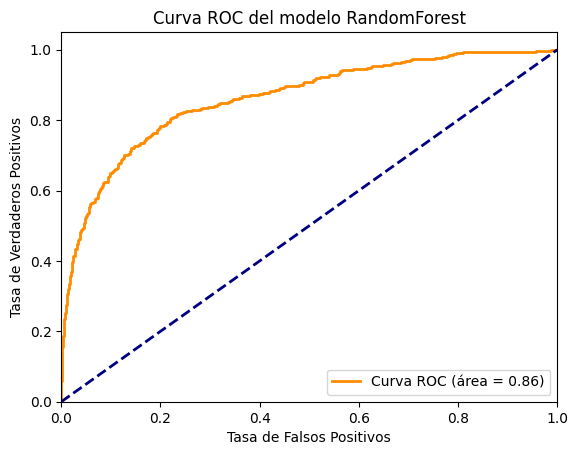

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realiza predicciones de probabilidad con el modelo
y_pred_proba = rf_final.predict_proba(X_test)[::,1]

# Calcula la tasa de verdaderos positivos y falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calcula el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Genera la gráfica
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo RandomForest')
plt.legend(loc="lower right")
plt.show()


# gridSearch randomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score


param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [10, 20, 30, 40, None],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier()


roc_scorer = make_scorer(roc_auc_score)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=roc_scorer, cv=3, verbose=2, n_jobs=-1)


grid_search.fit(X_train, y_train)


print(f'Mejores parámetros: {grid_search.best_params_}\n')

# Crea el modelo final con los mejores parámetros
rf_final = grid_search.best_estimator_

# Entrena el modelo final
rf_final.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_final = rf_final.predict(X_test)




Fitting 3 folds for each of 270 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Mejores parámetros: {'bootstrap': False, 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}



<ipython-input-14-e9aaf84a4d87>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_final.fit(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Define los parámetros
rf_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_depth': 40,
    'bootstrap': False
}

# Crea el modelo con los mejores parámetros encontrados
rf_final = RandomForestClassifier(**rf_params)

# Entrena el modelo final
rf_final.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_final = rf_final.predict(X_test)




<ipython-input-15-63149ebc387b>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_final.fit(X_train, y_train)


# curva roc

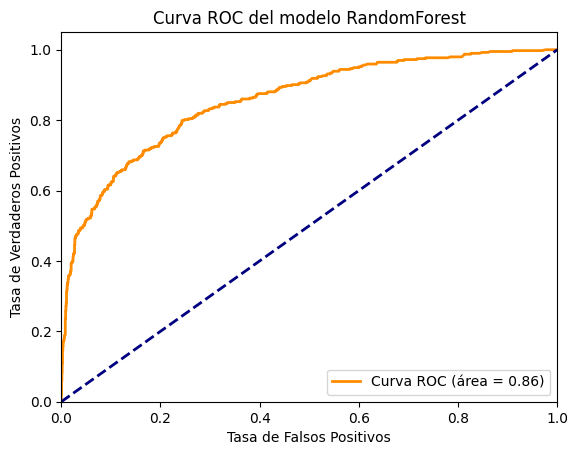

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realiza predicciones de probabilidad con el modelo
y_pred_proba = rf_final.predict_proba(X_test)[::,1]

# Calcula la tasa de verdaderos positivos y falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calcula el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Genera la gráfica
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo RandomForest')
plt.legend(loc="lower right")
plt.show()


la curva roc no ha subido

# iniciar xgboostClassifier

In [ ]:
from xgboost import XGBClassifier

# Define los parámetros para la búsqueda aleatoria
parametros_xgb = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9],
    'colsample_bytree': [0.3, 0.5, 0.7, 1],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Crea el modelo
xgb = XGBClassifier()

# Crea la búsqueda aleatoria
busqueda_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=parametros_xgb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Realiza la búsqueda aleatoria
busqueda_xgb.fit(X_train, y_train)
print(f'Mejores parámetros para XGBoost: {busqueda_xgb.best_params_}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores parámetros para XGBoost: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.5}


In [ ]:
print(f'Mejor puntuación para XGBoost: {busqueda_xgb.best_score_}')

Mejor puntuación para XGBoost: 0.862749573782647


# Modelo xgb

In [ ]:
from xgboost import XGBClassifier

# Crea el modelo con los mejores parámetros encontrados
xgb_final = XGBClassifier(n_estimators=500,
                          learning_rate=0.01,
                          max_depth=5,
                          gamma=0.2,
                          colsample_bytree=0.5)

# Entrena el modelo final
xgb_final.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_final = xgb_final.predict(X_test)




# Curva roc

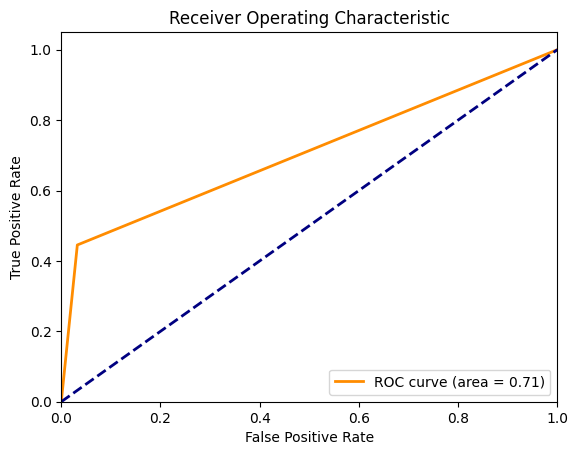

In [ ]:
from sklearn.metrics import roc_curve, auc
# Calcular las tasas de verdaderos y falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_pred_final)

# Calcular el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Crear una figura
plt.figure()

# Dibujar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Dibujar la línea de no discriminación
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Define los límites del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Añade etiquetas y título
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Muestra el gráfico
plt.show()


# Gridsearch

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define los parámetros para la búsqueda en cuadrícula
parametros_xgb = {
    'n_estimators': [400, 500, 600, 700, 800],
    'learning_rate': [0.005, 0.01, 0.015, 0.02, 0.025],
    'max_depth': [4, 5, 6, 7, 8],
    'gamma': [0.1, 0.15, 0.2, 0.25, 0.3],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8]
}

# Crea el modelo
xgb = XGBClassifier()

# Crea la búsqueda en cuadrícula
busqueda_xgb = GridSearchCV(estimator=xgb, param_grid=parametros_xgb, cv=3, verbose=2, n_jobs=-1)

# Realiza la búsqueda en cuadrícula
busqueda_xgb.fit(X_train, y_train)

# Imprime los mejores parámetros encontrados
print(f'Mejores parámetros para XGBoost: {busqueda_xgb.best_params_}')


Fitting 3 folds for each of 3125 candidates, totalling 9375 fits
Mejores parámetros para XGBoost: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}


In [ ]:
puntuacion_entrenamiento = busqueda_xgb.score(X_train, y_train)
print(f'Puntuación en el conjunto de entrenamiento: {puntuacion_entrenamiento}')

Puntuación en el conjunto de entrenamiento: 0.88675


# modelo final definitivo xgb

In [ ]:
from xgboost import XGBClassifier

# Crea el modelo con los parámetros proporcionados
xgb_final = XGBClassifier(n_estimators=500,
                          learning_rate=0.01,
                          max_depth=6,
                          gamma=0.1,
                          colsample_bytree=0.5)

# Entrena el modelo final
xgb_final.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_final = xgb_final.predict(X_test)

# Imprime la precisión y el puntaje F1 del modelo final
print(f'Accuracy on test for final XGBoost model: {accuracy_score(y_test, y_pred_final)}\n')
print(f'F1 score on test for final XGBoost model: {f1_score(y_test, y_pred_final)}\n')
recall = recall_score(y_test, y_pred_final)

print(f'Recall on test for final XGBoost model: {recall}\n')


Accuracy on test for final XGBoost model: 0.8685

F1 score on test for final XGBoost model: 0.5778491171749599

Recall on test for final XGBoost model: 0.4580152671755725



# Evaluar modelo

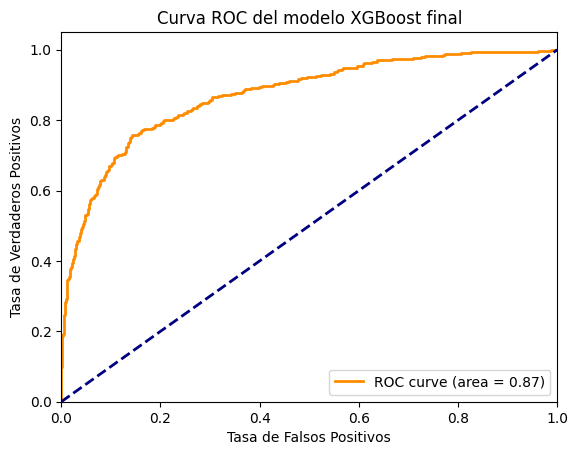

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcula las probabilidades de las clases
y_prob_final = xgb_final.predict_proba(X_test)

# Calcula la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_prob_final[:, 1])

# Calcula el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Crea la figura
plt.figure()

# Dibuja la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Dibuja la línea de no discriminación
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Define los límites del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Define los títulos y las etiquetas
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo XGBoost final')
plt.legend(loc="lower right")

# Muestra el gráfico
plt.show()


# Resultados de f1, recall y precision de random Forest

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Realiza predicciones con el modelo RandomForest
y_pred_rf = rf_final.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

print(f'Para el modelo RandomForest:\n')
print(f'Precisión: {accuracy_rf}\n')
print(f'Puntaje F1: {f1_rf}\n')
print(f'Recall: {recall_rf}\n')
print(f'Precision: {precision_rf}\n')


Para el modelo RandomForest:

Precisión: 0.87

Puntaje F1: 0.5950155763239876

Recall: 0.4860050890585242

Precision: 0.7670682730923695



# resultados para xgboost

In [ ]:
y_pred_xgb = xgb_final.predict(X_test)
# Calcula y muestra las métricas para el modelo XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)

print(f'Para el modelo XGBoost:\n')
print(f'Precisión: {accuracy_xgb}\n')
print(f'Puntaje F1: {f1_xgb}\n')
print(f'Recall: {recall_xgb}\n')
print(f'Precision: {precision_xgb}\n')


Para el modelo XGBoost:

Precisión: 0.8685

Puntaje F1: 0.5778491171749599

Recall: 0.4580152671755725

Precision: 0.782608695652174



In [ ]:
import pandas as pd

# Realiza predicciones con el modelo RandomForest
y_pred_rf = rf_final.predict(X_test)

# Realiza predicciones con el modelo XGBoost
y_pred_xgb = xgb_final.predict(X_test)

# Crea DataFrames con las predicciones
y_test_df = pd.DataFrame(y_test, columns=['Real'])
y_pred_rf_df = pd.DataFrame(y_pred_rf, columns=['Predicted_RF'])
y_pred_xgb_df = pd.DataFrame(y_pred_xgb, columns=['Predicted_XGB'])

# Concatena los DataFrames
comparison = pd.concat([y_test_df.reset_index(drop=True), y_pred_rf_df.reset_index(drop=True), y_pred_xgb_df.reset_index(drop=True)], axis=1)

# Muestra las primeras filas del DataFrame
print(comparison.head(10))


   Real  Predicted_RF  Predicted_XGB
0     0             0              0
1     0             0              0
2     0             0              0
3     0             0              0
4     0             0              0
5     0             0              0
6     0             0              0
7     1             0              0
8     0             0              0
9     0             0              0


data

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from google.colab import files

# Supongamos que 'df' es tu DataFrame
data.to_csv('churn_limpio.csv', index=False)

# Descarga el archivo a tu máquina local
files.download('churn_limpio.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modelo Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define los parámetros para la búsqueda aleatoria
parametros_rf = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crea el modelo
rf = RandomForestClassifier()

# Crea la búsqueda aleatoria
busqueda_rf = RandomizedSearchCV(estimator=rf, param_distributions=parametros_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Realiza la búsqueda aleatoria
busqueda_rf.fit(X_train, y_train)
print(f'Mejores parámetros para RandomForest: {busqueda_rf.best_params_}')

Mejores parámetros para RandomForest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 40, 'bootstrap': True}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Definir los parámetros
rf_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_depth': 40,
    'bootstrap': True
}

# Creae el modelo con los mejores parámetros encontrados
rf_final = RandomForestClassifier(**rf_params)

# Entrenae el modelo final
rf_final.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_final = rf_final.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realiza predicciones de probabilidad con el modelo
y_pred_proba = rf_final.predict_proba(X_test)[::,1]

# Calcula la tasa de verdaderos positivos y falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calcula el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Genera la gráfica
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo RandomForest')
plt.legend(loc="lower right")
plt.show()

# grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score


param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [10, 20, 30, 40, None],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier()


roc_scorer = make_scorer(roc_auc_score)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=roc_scorer, cv=3, verbose=2, n_jobs=-1)


grid_search.fit(X_train, y_train)


print(f'Mejores parámetros: {grid_search.best_params_}\n')

# Crea el modelo final con los mejores parámetros
rf_final = grid_search.best_estimator_

# Entrena el modelo final
rf_final.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_final = rf_final.predict(X_test)

Mejores parámetros: {'bootstrap': False, 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

In [ ]:
#aplicando parametros del gridSearch
from sklearn.ensemble import RandomForestClassifier


# Define los parámetros
rf_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_depth': 40,
    'bootstrap': False
}

# Crea el modelo con los mejores parámetros encontrados
rf_final = RandomForestClassifier(**rf_params)

# Entrena el modelo final
rf_final.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_final = rf_final.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realiza predicciones de probabilidad con el modelo
y_pred_proba = rf_final.predict_proba(X_test)[::,1]

# Calcula la tasa de verdaderos positivos y falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calcula el área bajo la curva ROC
roc_auc = auc(fpr, tpr)

# Genera la gráfica
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo RandomForest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Realiza predicciones con el modelo RandomForest
y_pred_rf = rf_final.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

print(f'Para el modelo RandomForest:\n')
print(f'Precisión: {accuracy_rf}\n')
print(f'Puntaje F1: {f1_rf}\n')
print(f'Recall: {recall_rf}\n')
print(f'Precision: {precision_rf}\n')

In [ ]:
import pandas as pd

# Realiza predicciones con Random Forest
predictions_rf_final = rf_final.predict(X_test)

# Crea DataFrames para las etiquetas reales y las predichas
y_test_df_rf = pd.DataFrame(y_test)
predictions_df_rf = pd.DataFrame(predictions_rf_final)

# Concatena los DataFrames
comparison_rf = pd.concat([y_test_df_rf.reset_index(drop=True), predictions_df_rf.reset_index(drop=True)], axis=1)

# Asigna nombres a las columnas
comparison_rf.columns = ['Real', 'Predicted_RF']

# Muestra las primeras filas del DataFrame
print(comparison_rf.head(10))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Realiza predicciones con el modelo final de Random Forest
y_pred_final = rf_final.predict(X_test)

# Calcula las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

# Imprime las métricas de rendimiento
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


In [ ]:
# Obtén la importancia de las características
importances = rf_final.feature_importances_

# Para un mejor entendimiento, crea un DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Ordena el DataFrame de acuerdo a la importancia de las características
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Imprime las características y su importancia
print(feature_importances)